Loading Library Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

Reading and Exploring the Healthcare Dataset

In [ ]:
df=pd.read_csv('/content/health care diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data PreProcessing:Treating the Missing Values

In [ ]:
print(df['Glucose'].mean())
print(df['BloodPressure'].mean())
print(df['SkinThickness'].mean())
print(df['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [ ]:
print('Glucose-',len(df['Glucose'][df['Glucose']==0]))
print('BloodPressure-',len(df['BloodPressure'][df['BloodPressure']==0]))
print('SkinThickness-',len(df['SkinThickness'][df['SkinThickness']==0]))
print('Insulin-',len(df['Insulin'][df['Insulin']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


Percentage of Null Values for Each Column

In [ ]:
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin']
null_percentage = (df[selected_columns] == 0).mean() * 100
print(null_percentage)

Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


In [ ]:
df['Glucose']=df['Glucose'].replace([0],[df['Glucose'].mean()])
df['BloodPressure']=df['BloodPressure'].replace([0],[df['BloodPressure'].mean()])
df['SkinThickness']=df['SkinThickness'].replace([0],[df['SkinThickness'].mean()])
df['Insulin']=df['Insulin'].replace([0],[df['Insulin'].mean()])

Percentage of Null Values for Each Column after the null value treatment

In [ ]:
null_percentage_treated = (df[selected_columns] == 0).mean() * 100
print(null_percentage_treated)

Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


Detecting Outliers and Treatment

In [ ]:
columns=df[selected_columns]

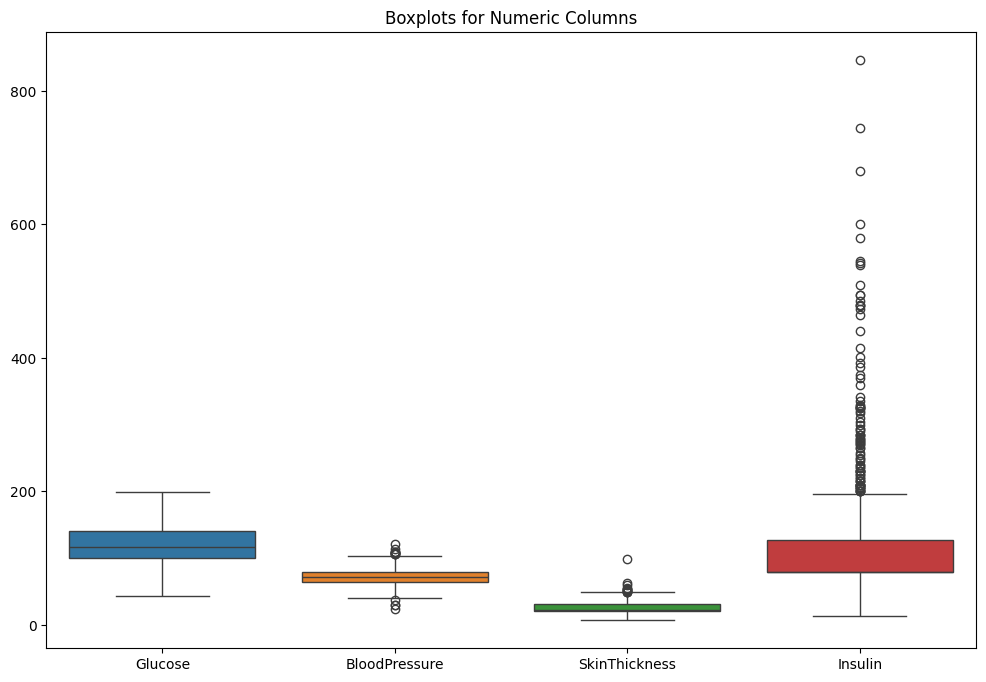

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
def find_outliers_iqr(data, column_name):
   Q1 = df[column_name].quantile(0.25)
   Q3 = df[column_name].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
   count_outliers = len(outliers)
   return count_outliers
for column_name in selected_columns:
   outlier_count = find_outliers_iqr(df, column_name)
   print(f"Number of outliers in the '{column_name}' column: {outlier_count}")


Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89


Outlier Treatment

In [ ]:
sorted(df)
Q1=df.quantile(0.20)
Q3=df.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.900000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [ ]:
df_cleared_iqr = df[~((df< (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleared_iqr
print(df_cleared_iqr.shape)
print(df.shape)

(678, 9)
(768, 9)


In [ ]:
df_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


Inferences from Outlier Removal using IQR Method

In [ ]:
col=df_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

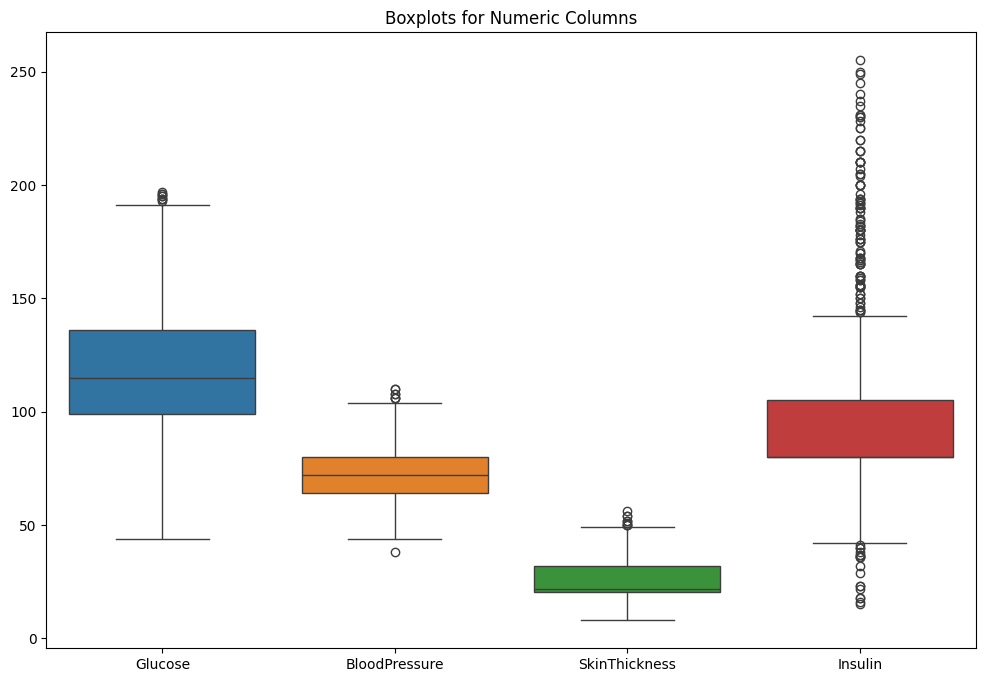

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=col)
plt.title("Boxplots for Numeric Columns")
plt.show()

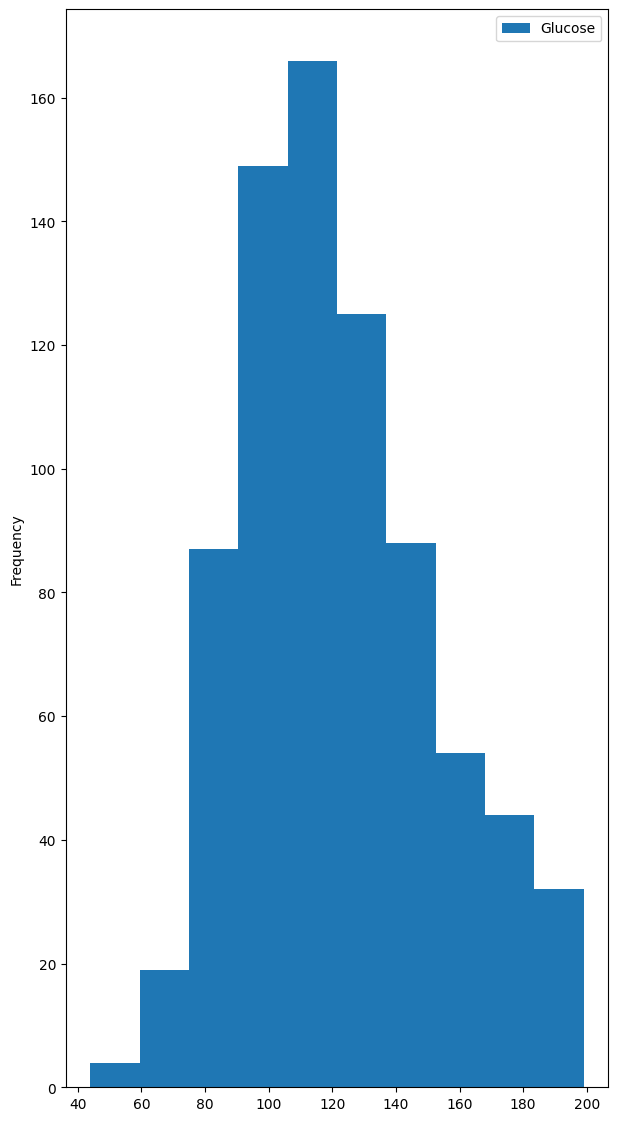

In [ ]:
df['Glucose'].plot(kind='hist',figsize=(7,14))
plt.legend()
plt.show()

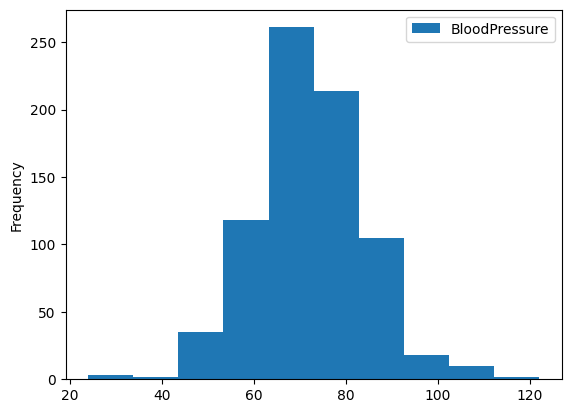

In [ ]:
df['BloodPressure'].plot(kind='hist')
plt.legend()
plt.show()

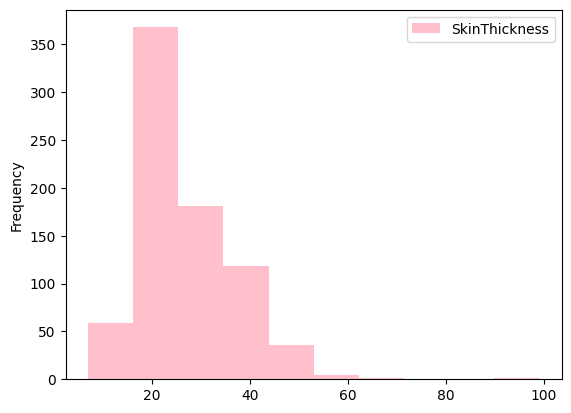

In [ ]:
df['SkinThickness'].plot(kind='hist',color='pink')
plt.legend()
plt.show()

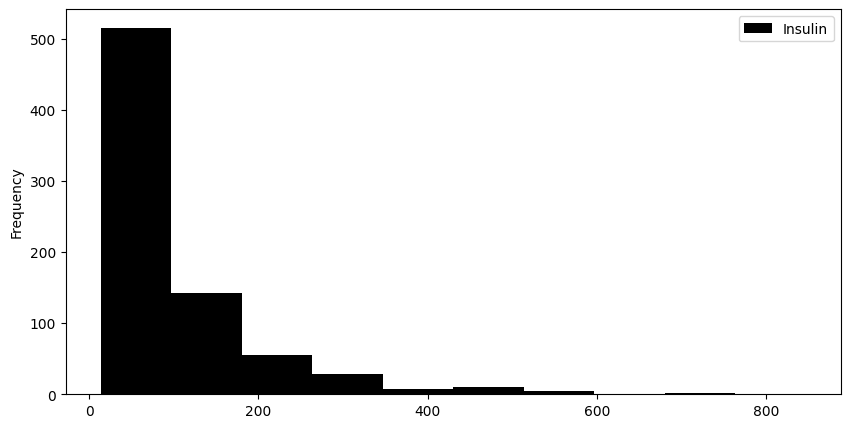

In [ ]:
df['Insulin'].plot(kind='hist',figsize=(10,5),color='black')
plt.legend()
plt.show()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

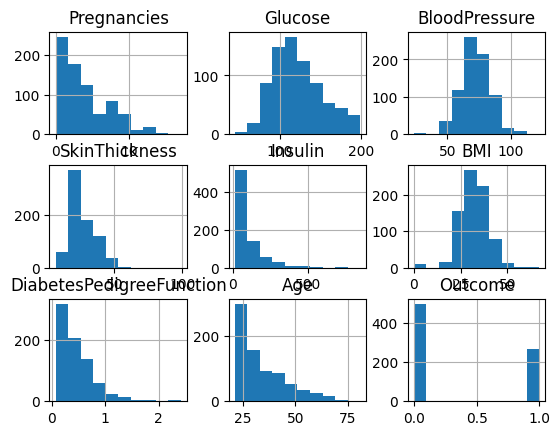

In [ ]:
df.hist()

Violin Plot for Selected Features

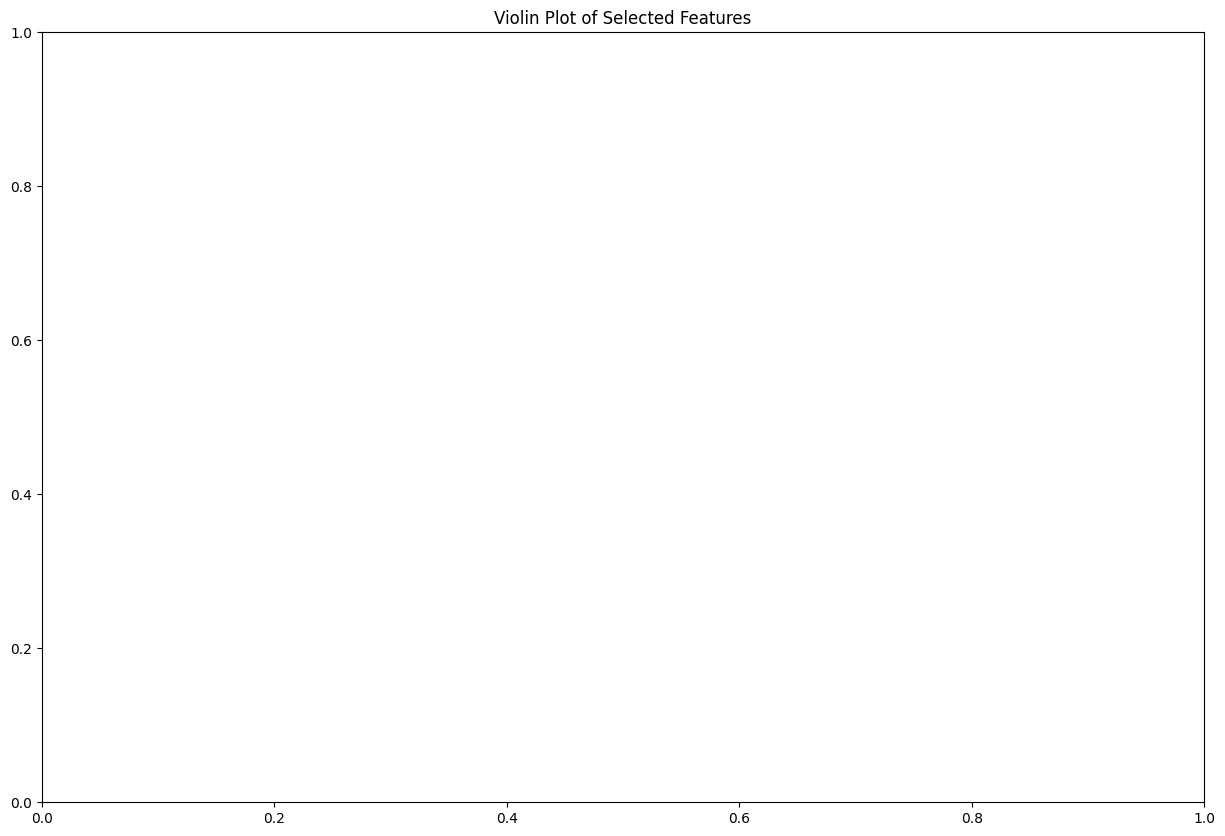

In [ ]:
plt.figure(figsize=(15, 10))
sns.violinplot(df=df[selected_columns])
plt.title("Violin Plot of Selected Features")
plt.show()

Kernel Density Estimation(KDE) for Selected Plots

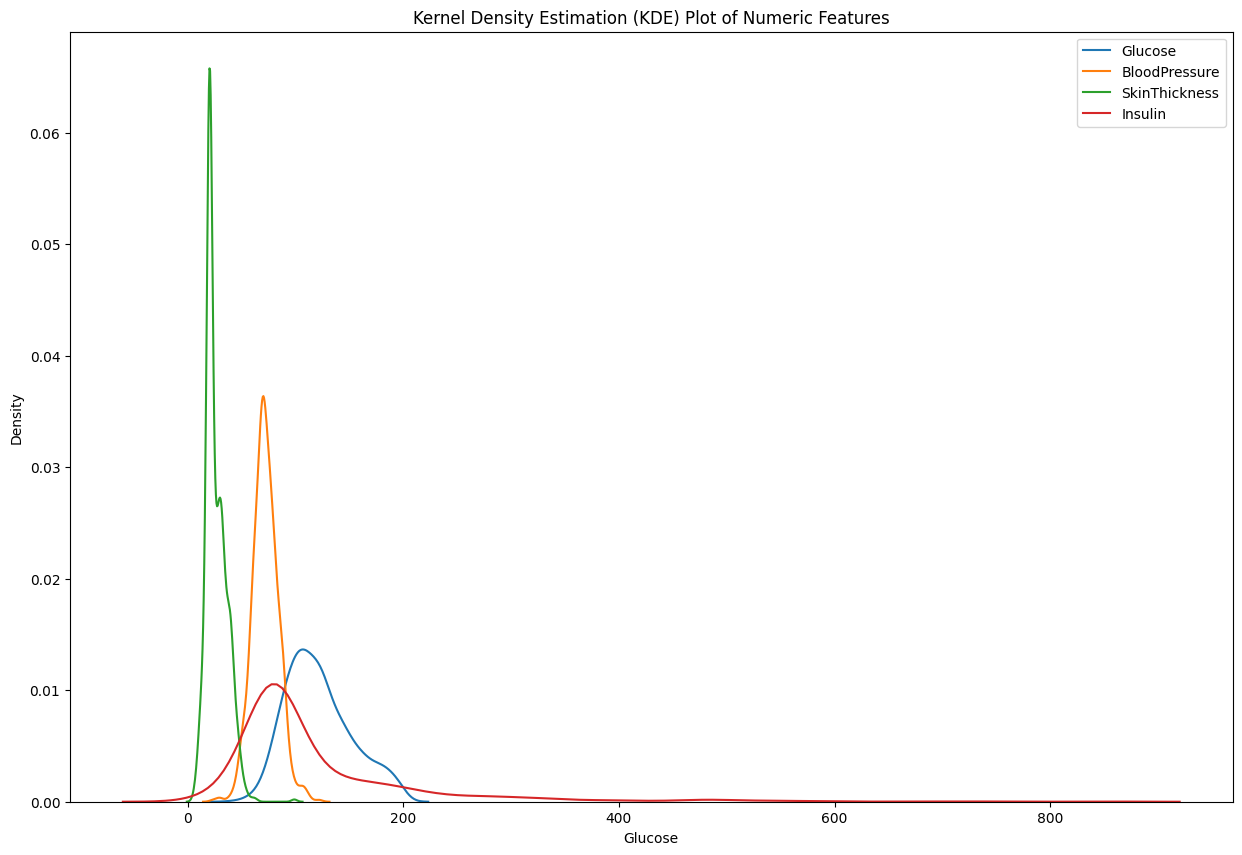

In [ ]:
plt.figure(figsize=(15, 10))
for column in selected_columns:
    sns.kdeplot(df[column], label=column)
plt.title("Kernel Density Estimation (KDE) Plot of Numeric Features")
plt.legend()
plt.show()

Datatypes and Count of Variables

In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.dtypes.value_counts()

,count
float64,6
int64,3


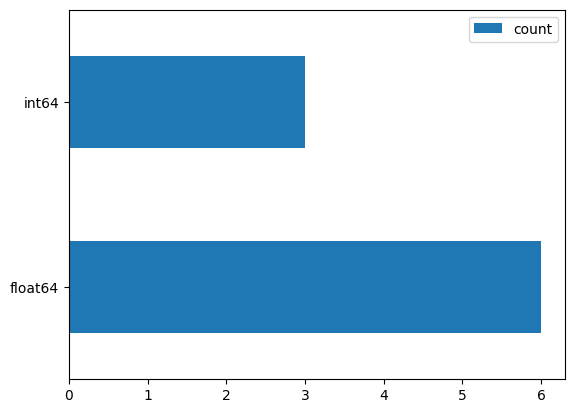

In [ ]:
figsize=(14,3)
df.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

Data Exploration

In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


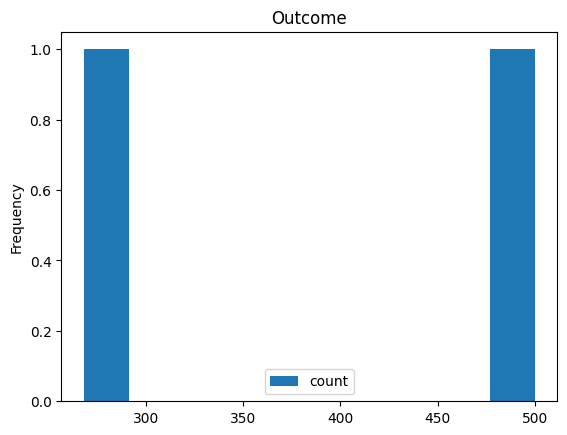

In [ ]:
df['Outcome'].value_counts().plot(kind='hist')
plt.legend()
plt.title('Outcome')
plt.show()

In [ ]:
outcome=(df['Outcome'].value_counts()/df['Outcome'].shape)*100
outcome

,count
Outcome,
0,65.104167
1,34.895833


Inferences from Outcome Distribution

In [ ]:
balanced_df=100-outcome
balanced_df

,count
Outcome,
0,34.895833
1,65.104167


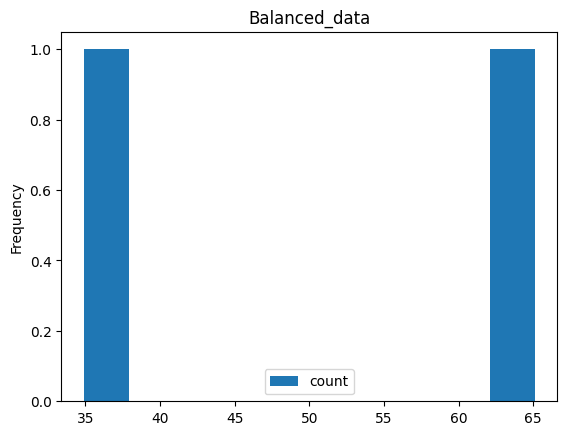

In [ ]:
balanced_df.plot(kind='hist')
plt.legend()
plt.title('Balanced_data')
plt.show()

Bi-Variate Analysis

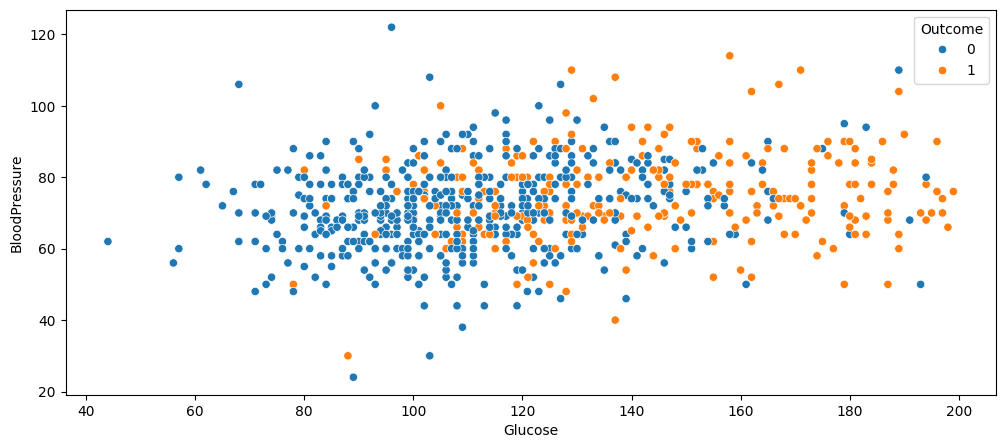

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=df)
plt.show()

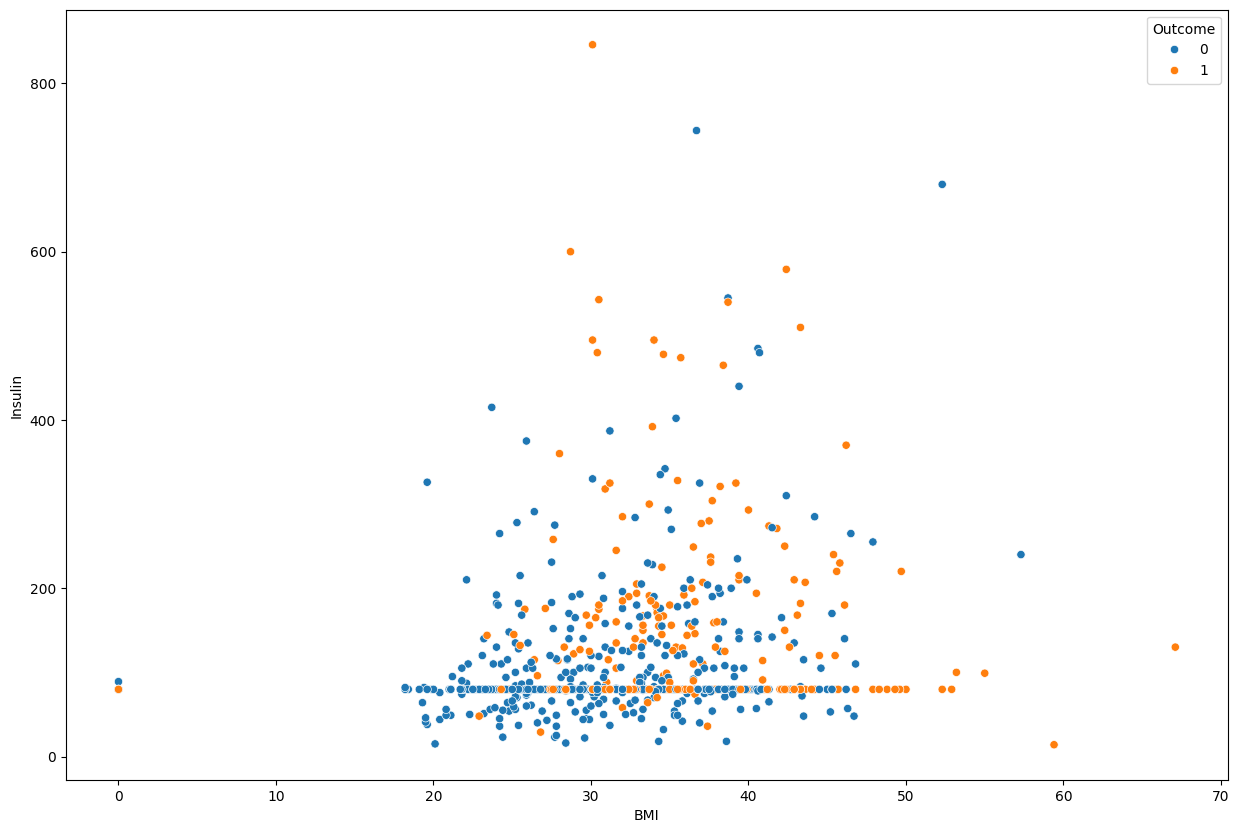

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=df)
plt.show()

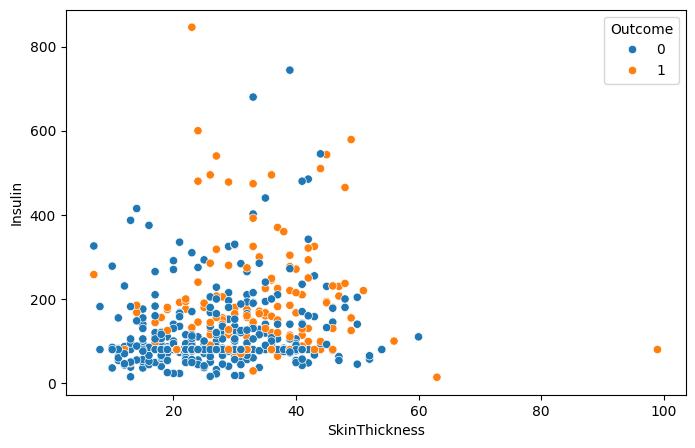

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=df)
plt.show()

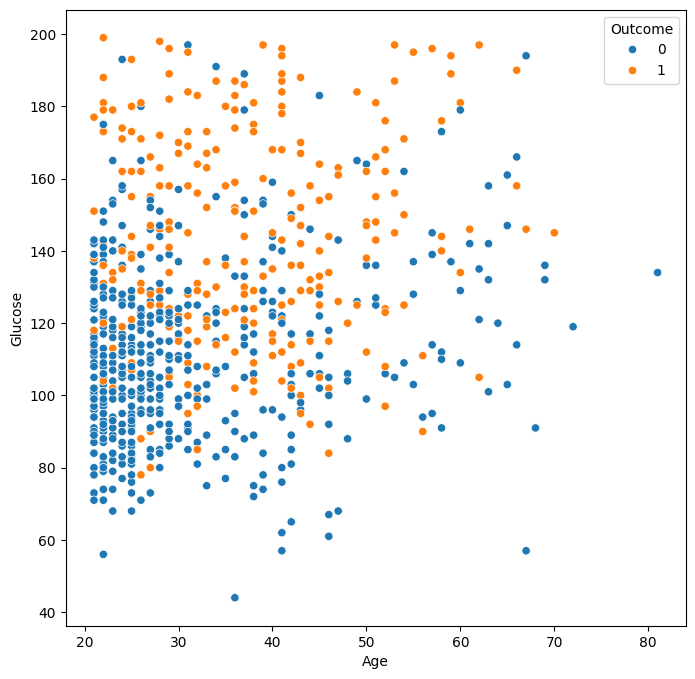

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=df)
plt.show()

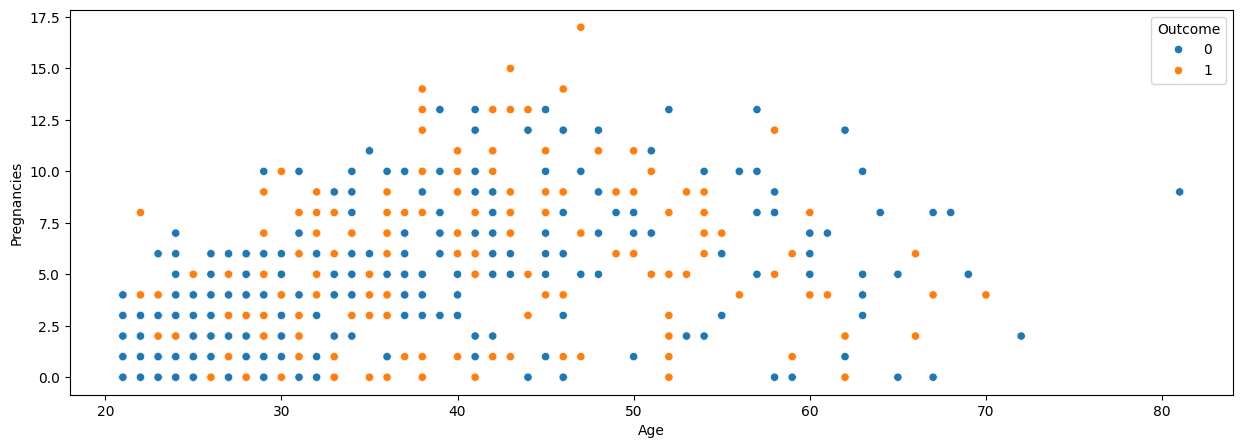

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=df)
plt.show()

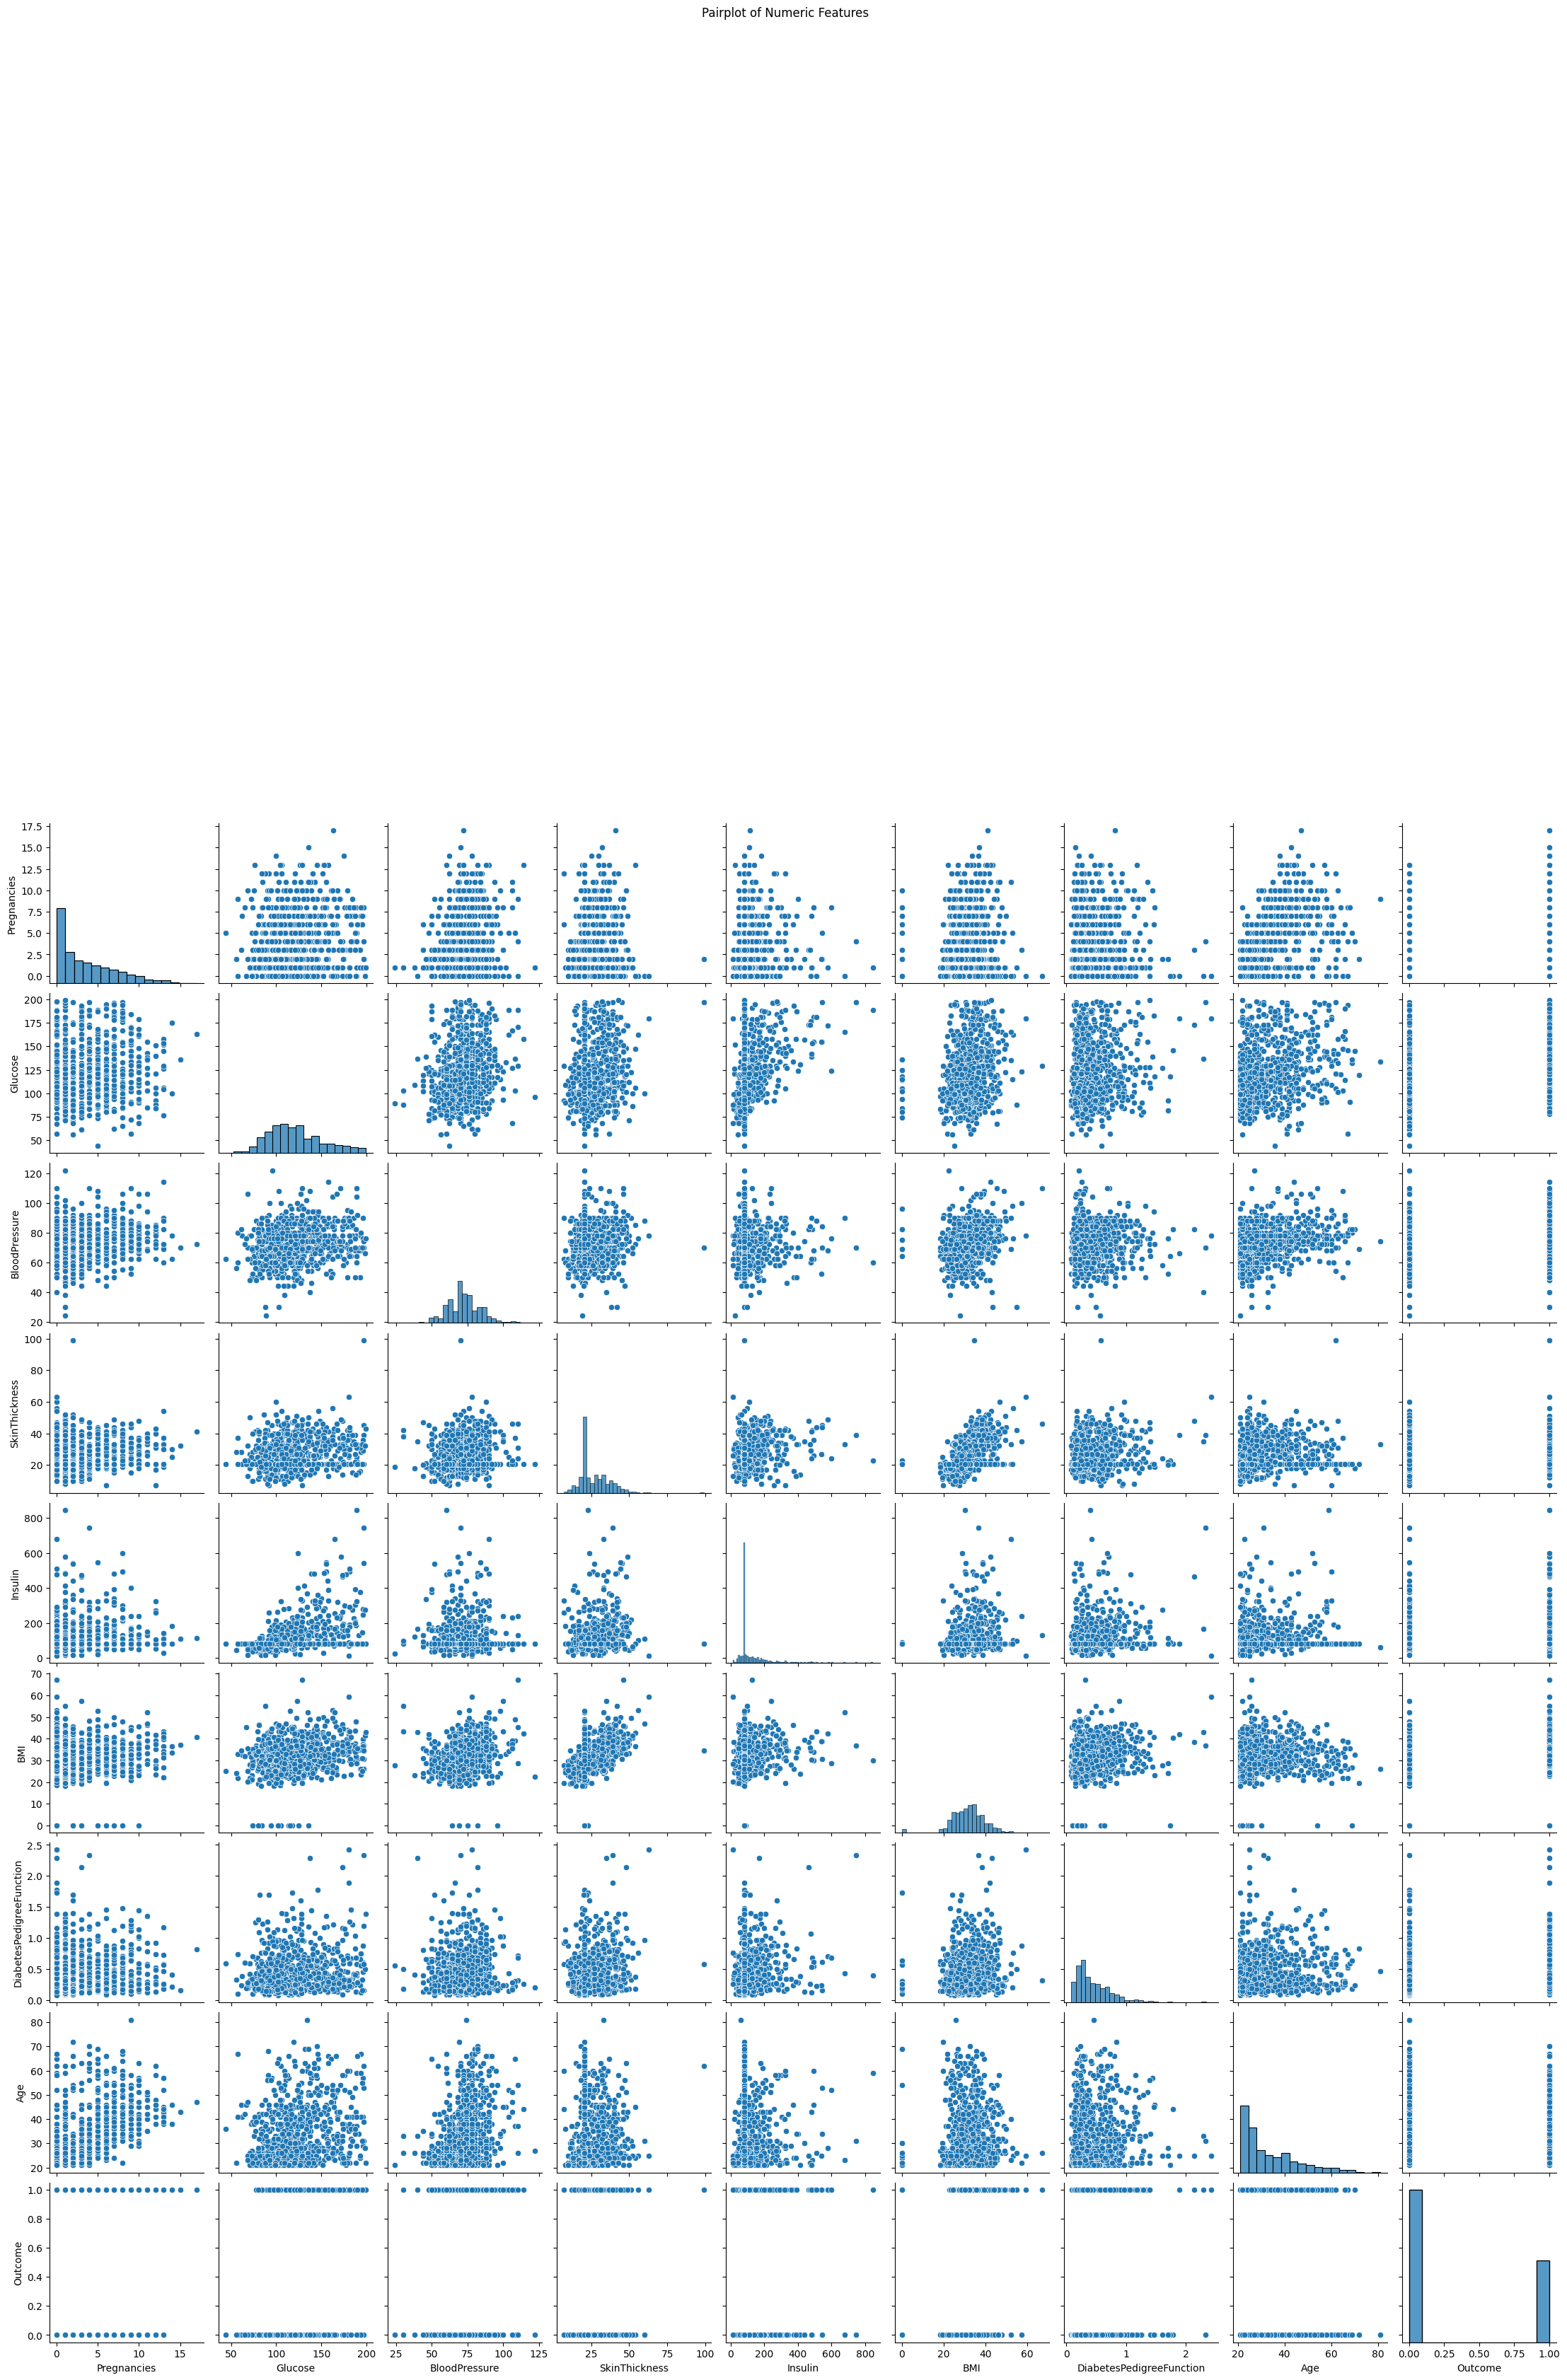

In [ ]:
sns.pairplot(df)
plt.suptitle("Pairplot of Numeric Features", y=1.5)
plt.show()

Multi-Variate Analysis

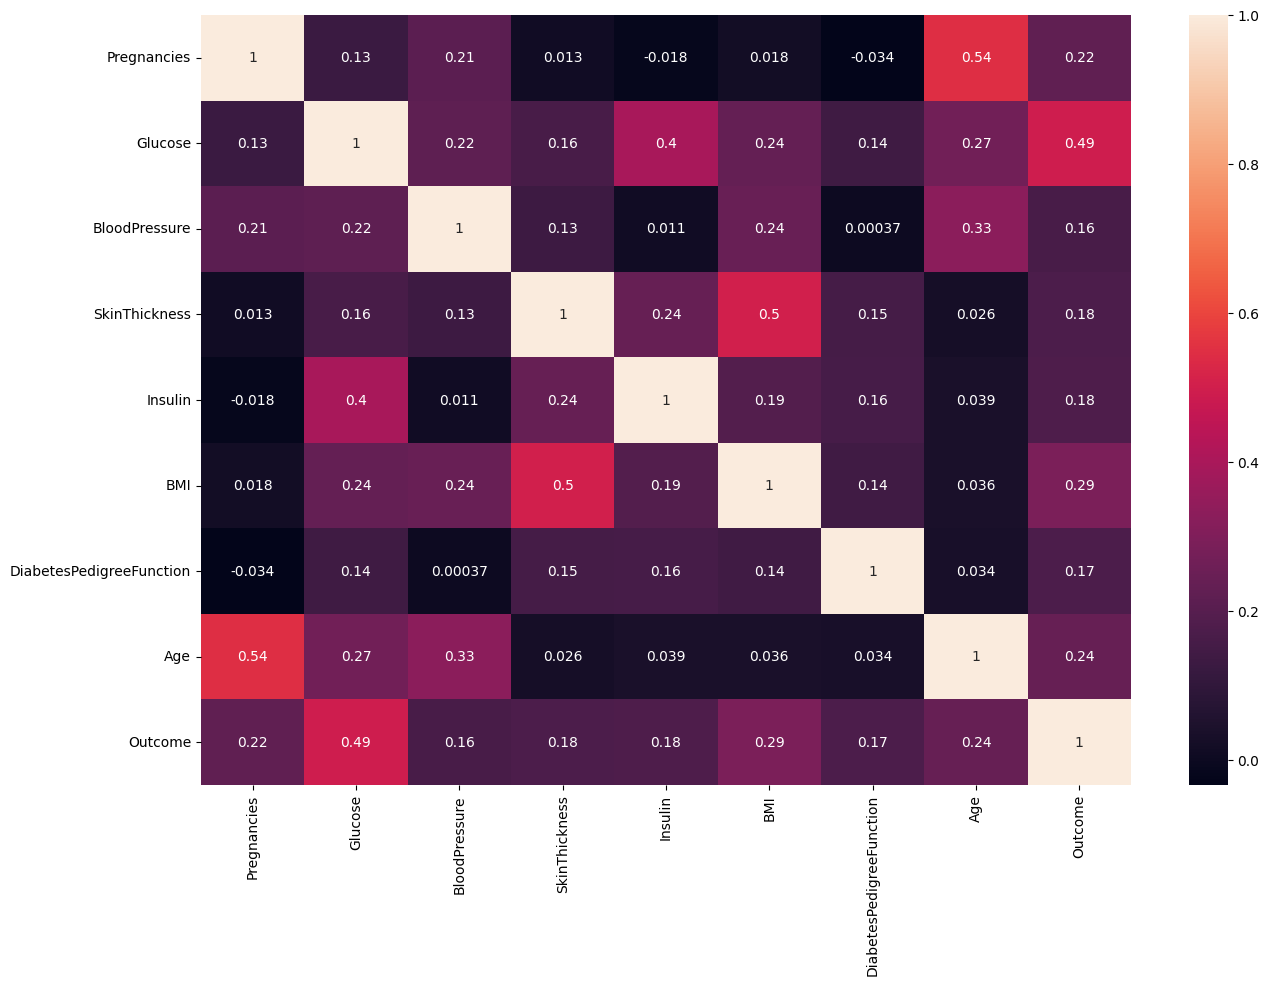

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Feature Selection

In [ ]:
x=df.drop(['Outcome'],axis=1)
y=df.Outcome

In [ ]:
df.corrwith(df['Outcome'])

,0
Pregnancies,0.221898
Glucose,0.492908
BloodPressure,0.162986
SkinThickness,0.175026
Insulin,0.179185
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from pandas import DataFrame

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(8,'Score'))

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
5                       BMI   127.669343
0               Pregnancies   111.519691
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


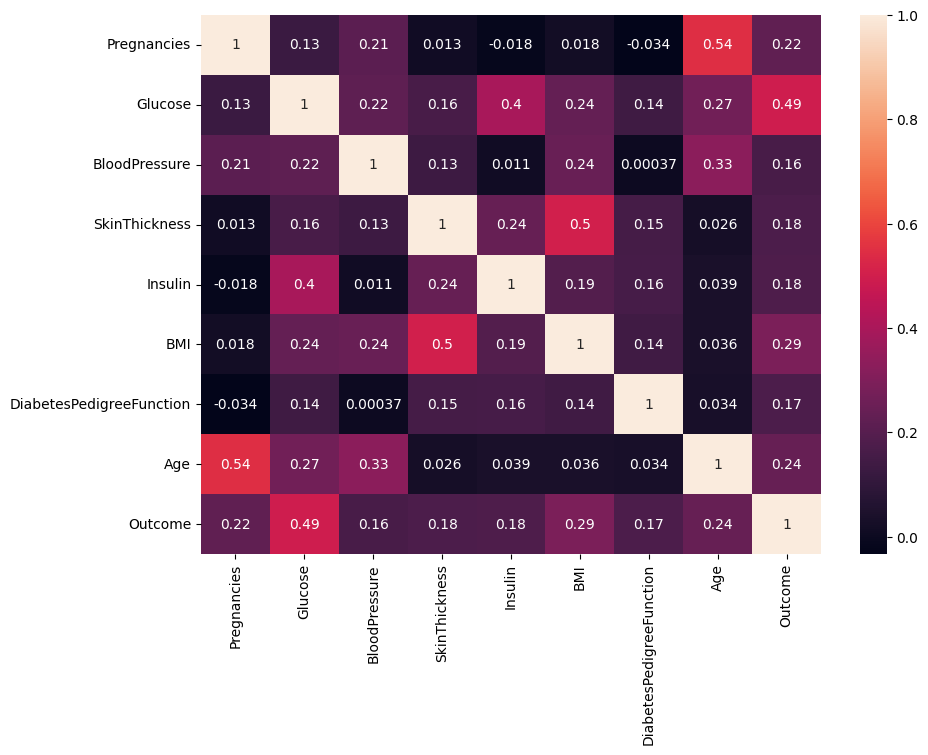

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

[0.10722854 0.24723102 0.09516481 0.08367359 0.08022898 0.13279569
 0.11659173 0.13708565]


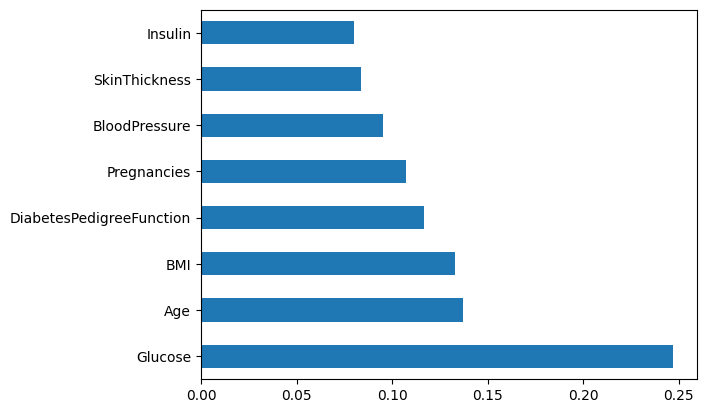

In [ ]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [ ]:
new_x=df.drop(['Outcome','BloodPressure'],axis=1).values
new_y=df.Outcome.values

SMOTE to address th Class Imbalance

Train a Model

In [ ]:
trainx,testx,trainy,testy=train_test_split(new_x,new_y,test_size=0.20,random_state=10)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(trainy == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainy == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =63)
trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel())
print('After OverSampling, the shape of train_X: {}'.format(trainx_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(trainy_res.shape))


print("After OverSampling, counts of label '1': {}".format(sum(trainy_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainy_res == 0)))

Before OverSampling, counts of label '1': 209
Before OverSampling, counts of label '0': 405 

After OverSampling, the shape of train_X: (810, 7)
After OverSampling, the shape of train_y: (810,) 

After OverSampling, counts of label '1': 405
After OverSampling, counts of label '0': 405


Model 1:Building a Logistic Regression Model

In [ ]:
logreg=LogisticRegression(solver='liblinear',random_state=123)

In [ ]:
logreg.fit(trainx_res,trainy_res)

LogisticRegression(random_state=123, solver='liblinear')

In [ ]:
prediction=logreg.predict(testx)

In [ ]:
print('Accuracy_score -',accuracy_score(testy,prediction))
print('Mean_squared_error -',mean_squared_error(testy,prediction))

Accuracy_score - 0.7337662337662337
Mean_squared_error - 0.2662337662337662


In [ ]:
print((confusion_matrix(testy,prediction)))


[[70 25]
 [16 43]]


In [ ]:
print(classification_report(testy,prediction))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        95
           1       0.63      0.73      0.68        59

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.74      0.73      0.74       154



AUC: 0.839


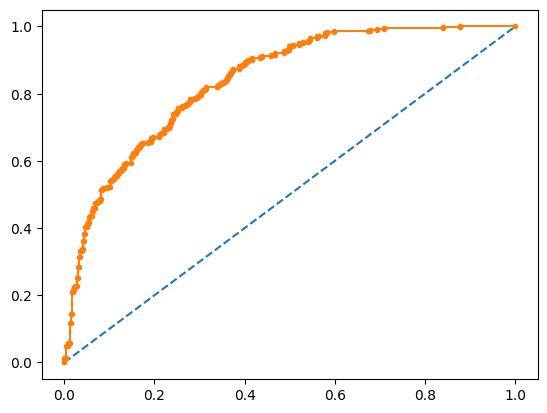

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = logreg.predict_proba(trainx_res)
probs = probs[:, 1]
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

Model 2:RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(random_state=42,max_depth=5)

In [ ]:
rf.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
rf_predict=rf.predict(testx)

In [ ]:
print('Accuracy_score -',accuracy_score(testy,rf_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_predict))

Accuracy_score - 0.7402597402597403
Mean_squared_error - 0.2597402597402597


RandomForestClassifier(Hyper Parameter Tunning)

In [ ]:
param_grid={'n_estimators':[100,400,200,300],'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_samples_split':[2,4,3],'min_samples_leaf':[1,2,3],
'max_leaf_nodes':[1,2,3],'max_samples':[2,4,3]}

In [ ]:
grid=GridSearchCV( estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)

In [ ]:
rf_grid=RandomForestClassifier(criterion= 'gini',max_depth= 2,max_leaf_nodes=3,max_samples=4,min_samples_leaf= 1,min_samples_split=3,
 n_estimators= 400,random_state=42)

In [ ]:
rf_grid.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, max_samples=4,
                       min_samples_split=3, n_estimators=400, random_state=42)

In [ ]:
rf_grid_predict=rf_grid.predict(testx)

In [ ]:
print('Accuracy_score -',accuracy_score(testy,rf_grid_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_grid_predict))

Accuracy_score - 0.7337662337662337
Mean_squared_error - 0.2662337662337662


In [ ]:
print((confusion_matrix(testy,prediction)))

[[70 25]
 [16 43]]


In [ ]:
print(classification_report(testy,prediction))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        95
           1       0.63      0.73      0.68        59

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.74      0.73      0.74       154



AUC: 0.938


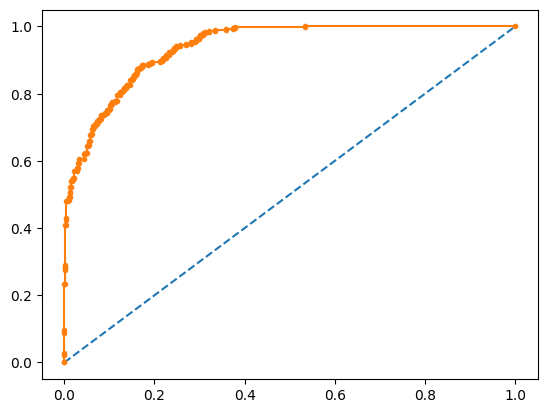

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = rf.predict_proba(trainx_res)
probs = probs[:, 1]
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

Model 3:DecisionTreeClassifier

In [ ]:
dc=DecisionTreeClassifier(random_state=42)

In [ ]:
dc.fit(trainx_res,trainy_res)

DecisionTreeClassifier(random_state=42)

In [ ]:
dc_pred=dc.predict(testx)

In [ ]:
print('Accuracy_score -',accuracy_score(testy,dc_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_pred))

Accuracy_score - 0.6623376623376623
Mean_squared_error - 0.33766233766233766


DecisionTreeClassifier(Hyper Parameter Tunning)

In [ ]:
c_param_grid={'splitter':["best", "random"],'criterion':['gini','entropy'],'max_depth':[1,2,3],
'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]}

In [ ]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
dc = RandomForestClassifier()
dc_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
dc_grid = GridSearchCV(estimator=dc, param_grid=dc_param_grid, n_jobs=-1, cv=5, verbose=2)
dc_grid.fit(trainx_res, trainy_res)
print(f"Best parameters: {dc_grid.best_params_}")
print(f"Best score: {dc_grid.best_score_}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'max_depth': None, 'n_estimators': 100}
Best score: 0.8234567901234568


In [ ]:
dc_grid.best_params_

{'max_depth': None, 'n_estimators': 100}

In [ ]:
dc_final=DecisionTreeClassifier(criterion= 'gini', max_depth=2,max_leaf_nodes=4,min_samples_leaf= 1,
min_samples_split= 2,splitter='best',random_state=42)

In [ ]:
dc_final.fit(trainx_res,trainy_res)
dc_final_pred=dc_final.predict(testx)

In [ ]:
print('Accuracy_score -',accuracy_score(testy,dc_final_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_final_pred))

Accuracy_score - 0.6883116883116883
Mean_squared_error - 0.3116883116883117


In [ ]:
print((confusion_matrix(testy,dc_final_pred)))

[[73 22]
 [26 33]]


In [ ]:
print((classification_report(testy,dc_final_pred)))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.60      0.56      0.58        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.68      0.69      0.69       154



AUC: 0.795


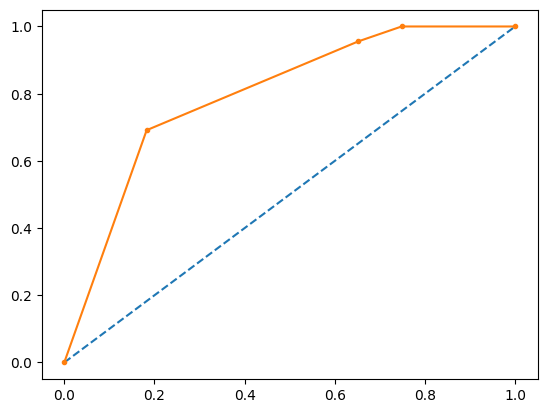

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = dc_final.predict_proba(trainx_res)
probs = probs[:, 1]
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

Model Accuracy Comparison

In [ ]:
Algorithms=['RandomForest','Decisiontree']
Accuracy_Score=[accuracy_score(testy,rf_grid_predict),accuracy_score(testy,dc_final_pred)]
accuracy_df = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': Accuracy_Score})
print(accuracy_df)

      Algorithm  Accuracy
0  RandomForest  0.733766
1  Decisiontree  0.688312
